In [1]:
#Import packages
import pandas as pd

# Read the data into a DataFrame named ri ('ri' for Rhode Island)
ri = pd.read_csv('ri_statewide.csv')

C:\Users\sohan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6,17,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
ri.head()

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,raw_SearchResultTwo,raw_SearchResultThree
0,1,22-11-2005,11:15:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
1,2,01-10-2005,12:20:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
2,3,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN
3,4,01-10-2005,12:50:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
4,5,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN


In [3]:
# Count the number of missing values in each column
ri.isnull().sum()

raw_row_number                0
date                         10
time                         10
zone                         10
subject_race              29073
subject_sex               29097
department_id                10
type                          0
arrest_made               29073
citation_issued           29073
warning_issued            29073
outcome                   35841
contraband_found         491919
contraband_drugs         493693
contraband_weapons       497886
contraband_alcohol       508464
contraband_other         491919
frisk_performed              10
search_conducted              0
search_basis             491919
reason_for_search        491919
reason_for_stop           29073
vehicle_make             191564
vehicle_model            279593
raw_BasisForStop          29073
raw_OperatorRace          29073
raw_OperatorSex           29073
raw_ResultOfStop          29073
raw_SearchResultOne      491919
raw_SearchResultTwo      508862
raw_SearchResultThree    509513
dtype: i

In [4]:
# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['subject_sex'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

raw_row_number                0
date                          0
time                          0
zone                          0
subject_race                  0
subject_sex                   0
department_id                 0
type                          0
arrest_made                   0
citation_issued               0
warning_issued                0
outcome                    6763
contraband_found         462822
contraband_drugs         464596
contraband_weapons       468789
contraband_alcohol       479367
contraband_other         462822
frisk_performed               0
search_conducted              0
search_basis             462822
reason_for_search        462822
reason_for_stop               0
vehicle_make             162525
vehicle_model            250553
raw_BasisForStop              0
raw_OperatorRace              0
raw_OperatorSex               0
raw_ResultOfStop              0
raw_SearchResultOne      462822
raw_SearchResultTwo      479765
raw_SearchResultThree    480416
dtype: i

In [5]:
# Examine the head of the 'is_arrested' column
print(ri.arrest_made.head())

0    False
1    False
2    False
3    False
4    False
Name: arrest_made, dtype: object


In [6]:
# Check the datatypes of the dataframe columns
ri.dtypes

raw_row_number            int64
date                     object
time                     object
zone                     object
subject_race             object
subject_sex              object
department_id            object
type                     object
arrest_made              object
citation_issued          object
warning_issued           object
outcome                  object
contraband_found         object
contraband_drugs         object
contraband_weapons       object
contraband_alcohol       object
contraband_other         object
frisk_performed          object
search_conducted           bool
search_basis             object
reason_for_search        object
reason_for_stop          object
vehicle_make             object
vehicle_model            object
raw_BasisForStop         object
raw_OperatorRace         object
raw_OperatorSex          object
raw_ResultOfStop         object
raw_SearchResultOne      object
raw_SearchResultTwo      object
raw_SearchResultThree    object
dtype: o

In [7]:
# Change the data type of 'is_arrested' to 'bool'
ri['arrest_made'] = ri.arrest_made.astype('bool')

# Check the data type of 'is_arrested' 
ri.arrest_made.dtype

dtype('bool')

In [8]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.date.str.cat(ri.time, sep = ' ')

# Convert 'combined' to datetime format
ri['datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
ri.dtypes

raw_row_number                    int64
date                             object
time                             object
zone                             object
subject_race                     object
subject_sex                      object
department_id                    object
type                             object
arrest_made                        bool
citation_issued                  object
warning_issued                   object
outcome                          object
contraband_found                 object
contraband_drugs                 object
contraband_weapons               object
contraband_alcohol               object
contraband_other                 object
frisk_performed                  object
search_conducted                   bool
search_basis                     object
reason_for_search                object
reason_for_stop                  object
vehicle_make                     object
vehicle_model                    object
raw_BasisForStop                 object


In [9]:
# Set 'stop_datetime' as the index
ri.set_index('datetime', inplace=True)

# Examine the index
ri.index

DatetimeIndex(['2005-11-22 11:15:00', '2005-01-10 12:20:00',
               '2005-01-10 12:30:00', '2005-01-10 12:50:00',
               '2005-01-10 13:10:00', '2005-01-10 15:50:00',
               '2005-11-09 11:45:00', '2005-11-09 11:45:00',
               '2005-04-10 11:55:00', '2005-04-10 11:55:00',
               ...
               '2015-12-29 13:28:00', '2015-12-27 12:45:00',
               '2015-12-27 13:43:00', '2015-12-28 02:29:00',
               '2015-12-30 11:42:00', '2015-08-16 13:37:00',
               '2015-04-08 10:40:00', '2015-12-20 11:17:00',
               '2015-09-11 23:35:00', '2015-10-30 11:09:00'],
              dtype='datetime64[ns]', name='datetime', length=480584, freq=None)

In [43]:
# Express the counts as proportions
ri.outcome.value_counts(normalize=True)

citation    0.904092
warning     0.060867
arrest      0.035041
Name: outcome, dtype: float64

In [42]:
# Calculate the search rate for both groups simultaneously
ri.groupby(['subject_sex']).search_conducted.mean()

subject_sex
female    0.018751
male      0.043792
Name: search_conducted, dtype: float64

In [54]:
# Calculate the search rate for each combination of gender and violation
ri.groupby(['reason_for_stop','subject_sex']).search_conducted.mean()

reason_for_stop                   subject_sex
APB                               female         0.165138
                                  male           0.255319
Call for Service                  female         0.042230
                                  male           0.092419
Equipment/Inspection Violation    female         0.040245
                                  male           0.070916
Motorist Assist/Courtesy          female         0.033133
                                  male           0.089802
Other Traffic Violation           female         0.038021
                                  male           0.059156
Registration Violation            female         0.054700
                                  male           0.103589
Seatbelt Violation                female         0.017746
                                  male           0.031705
Special Detail/Directed Patrol    female         0.018045
                                  male           0.010249
Speeding                  

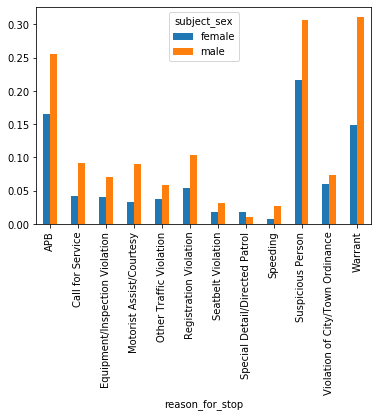

In [55]:
# Import matplotlib.pyplot as plt for visualization
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ri.groupby(['reason_for_stop','subject_sex']).search_conducted.mean().unstack().plot(kind='bar',ax = ax)

It is clear that men get stopped more than women from the above bar graph.

In [56]:
# Count the 'search_type' values
print(ri.reason_for_search.value_counts())

Incident to Arrest                                               6998
Probable Cause                                                   2063
Odor of Drugs/Alcohol                                            1872
Reasonable Suspicion                                             1141
Inventory/Tow                                                    1101
Terry Frisk                                                       879
Incident to Arrest|Inventory/Tow                                  582
Plain View                                                        425
Odor of Drugs/Alcohol|Probable Cause                              153
Probable Cause|Odor of Drugs/Alcohol                              145
Incident to Arrest|Odor of Drugs/Alcohol                          123
Incident to Arrest|Terry Frisk                                    102
Incident to Arrest|Probable Cause                                 100
Odor of Drugs/Alcohol|Incident to Arrest                           96
Odor of Drugs/Alcoho

In [57]:
# Check if 'search_type' contains the string 'Protective Frisk'
# When a search for weapons is authorized, the procedure is known as a stop and frisk

ri['frisk'] = ri.reason_for_search.str.contains('Frisk', na=False)

# Take the sum of 'frisk'
sum(ri.frisk)

1598

In [58]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the frisk rate for each gender
searched.groupby(['subject_sex']).frisk.mean()

subject_sex
female    0.066694
male      0.093707
Name: frisk, dtype: float64

Frisking is done on men almost all the time they are stopped (93% of the time).
Not the same case in women (66%)

In [59]:
# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).arrest_made.mean()

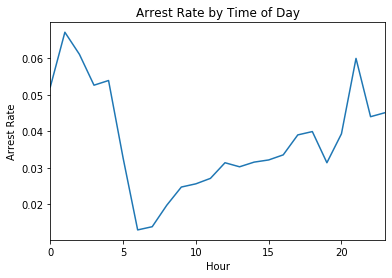

In [60]:
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()